In [84]:
import pandas as pd
%store -r my_data_nan

In [85]:
for key,df in my_data_nan.iteritems():
    if 'linkedin' not in df.index:
        print key

mundohispanico_df
steamcommunity_df
streamable_df
redd_df
patreon_df
mega_df
ashleyrnadison_df
imgur_df
discordapp_df
linkedin_df
gfycat_df


In [86]:
li_data = pd.DataFrame()
for key,df in my_data_nan.iteritems():
    if 'linkedin' in df.index:
        new_df = df.loc['linkedin'].rename(key.replace('_df','')).to_frame().reset_index().T
        new_df.columns = new_df.loc['year_month']
        new_df = new_df.drop(['year_month']) # (1,18)
        li_data = li_data.append(new_df)

In [87]:
li_data.isnull().sum()

year_month
2016-10     83
2016-11     90
2016-12     93
2017-01     87
2017-02     79
2017-03     71
2017-04     80
2017-05     72
2017-06     70
2017-07     99
2017-08    106
2017-09    112
2017-10     77
2017-11     84
2017-12     82
2018-01     82
2018-02     72
2018-03     59
dtype: int64

In [88]:
li_data = li_data.dropna(how='any')  

In [89]:
li_data

year_month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
citibankonline,0.0263893,0.0227805,0.00997636,0.0213722,0.015215,0.0326548,0.0155414,0.0233899,0.0136907,0.027423,0.00755334,0.00534738,0.00914547,0.0116489,0.0191742,0.0334471,0.0299027,0.0291939
gofundme,0.000776833,0.000694087,0.00125429,0.00107019,0.000970877,0.0012874,0.00136879,0.00165363,0.00153651,0.00122695,0.000914773,0.00103834,0.00161866,0.0014717,0.00139565,0.00162112,0.00151267,0.00187494
coursehero,0.00423927,0.0174658,0.0019465,0.00551008,0.00132814,0.0111159,0.0153928,0.013443,0.0150476,0.0190108,0.0663675,0.0375155,0.0318718,0.0359132,0.0589728,0.0603335,0.0355131,0.0271326
howtogeek,0.000297726,0.00118329,0.0020219,0.00354801,0.00158454,0.00230694,0.00087113,0.000829853,0.00203397,0.00609513,0.00201174,0.000766276,0.00216429,0.00243019,0.00226999,0.000648019,0.00385959,0.00410225
thrillist,0.00156279,0.000871667,0.0015484,0.000481807,0.00133345,0.00153689,0.00148239,0.00250914,0.00240393,0.00159723,0.00117429,0.00047769,0.00156921,0.0013662,0.00171677,0.00119524,0.00210931,0.00186473
github,0.00659637,0.00652519,0.00615762,0.00853817,0.00884978,0.0104703,0.0108842,0.0104786,0.00951055,0.00923109,0.00723386,0.00919501,0.00922557,0.0101027,0.00871224,0.0113115,0.0121964,0.0123193
indeed,0.105732,0.105856,0.0924294,0.086811,0.0941091,0.101251,0.0978121,0.10704,0.103088,0.0922117,0.0878213,0.0869229,0.0894535,0.0853365,0.0718157,0.0793638,0.074982,0.0766453
patch,0.00131806,0.000730147,0.001427,0.000539532,0.000493168,0.00123102,0.00254176,0.00386052,0.00159777,0.00149677,0.00124885,0.000921745,0.000861282,0.00179491,0.00267031,0.000915449,0.00131595,0.00169315
jezebel,0.00024733,0.000469257,0.000242614,0.000324663,0.0012251,0.000608903,0.00084743,0.00150522,0.00155279,0.000637891,0.000841969,0.000882997,0.000280427,0.000644112,0.0010765,0.000596595,0.00105001,0.00142111
scribd,0.00212328,0.00221936,0.00210989,0.00263633,0.00295411,0.00179329,0.00429448,0.00306983,0.00345523,0.00121061,0.00219471,0.00222901,0.00249981,0.00578254,0.00681305,0.00490117,0.00422405,0.00594753


In [90]:
li_avg_month = pd.DataFrame()
avg = []
for column in li_data:
    avg.append(li_data[column].mean()*100)

row = pd.Series(avg,li_data.columns.values)
li_avg_month = li_avg_month.append([row],ignore_index=True)
li_avg_month = li_avg_month.transpose().reset_index().rename(index=str,columns={'index':'date',0:'avg_share'})

In [91]:
li_avg_month

,date,avg_share
0,2016-10,2.070806
1,2016-11,1.835551
2,2016-12,1.761196
3,2017-01,1.963225
4,2017-02,2.022987
5,2017-03,2.325397
6,2017-04,2.121289
7,2017-05,2.278398
8,2017-06,2.147909
9,2017-07,1.772461


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import functions_social as fs

In [93]:
li_data1 = li_data*100.0
mb = li_data1.T.reset_index()

In [94]:
df_long = pd.melt(mb,'year_month', var_name = 'site',value_name ='share' )
df_long['share'] = df_long['share'].astype(np.float)
df_long

,year_month,site,share
0,2016-10,citibankonline,2.638934
1,2016-11,citibankonline,2.278046
2,2016-12,citibankonline,0.997636
3,2017-01,citibankonline,2.137222
4,2017-02,citibankonline,1.521502
5,2017-03,citibankonline,3.265480
6,2017-04,citibankonline,1.554142
7,2017-05,citibankonline,2.338993
8,2017-06,citibankonline,1.369070
9,2017-07,citibankonline,2.742301


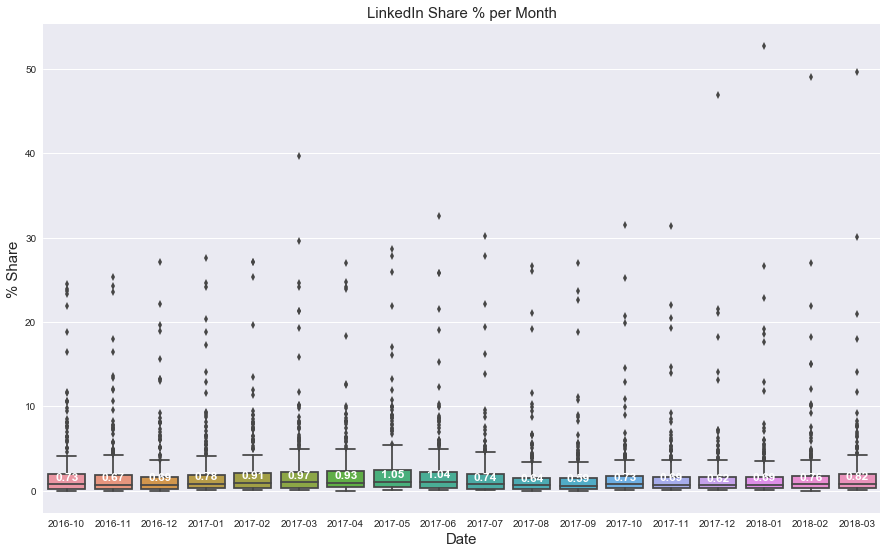

In [95]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='year_month',y='share',data=df_long)
#ax = sns.swarmplot(x='year_month',y='share',data=df_long)
medians = df_long.groupby(['year_month'])['share'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('LinkedIn Share % per Month',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('% Share',fontsize=15)

plt.show()

In [96]:
#perc change from 2016-10 to 2017-10
li_year_10 = li_data[['2016-10','2017-10']]
li_year_10['perc_change'] = (li_data['2017-10']-li_data['2016-10'])*100
li_year_10 = li_year_10.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

#perc change from 2016-11 to 2017-11
li_year_11 = li_data[['2016-11','2017-11']]
li_year_11['perc_change'] = (li_data['2017-11']-li_data['2016-11'])*100
li_year_11 = li_year_11.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

li_year_12 = li_data[['2016-12','2017-12']]
li_year_12['perc_change'] = (li_data['2017-12']-li_data['2016-12'])*100
li_year_12 = li_year_12.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

li_year_1 = li_data[['2017-01','2018-01']]
li_year_1['perc_change'] = (li_data['2018-01']-li_data['2017-01'])*100
li_year_1 = li_year_1.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

li_year_2 = li_data[['2017-02','2018-02']]
li_year_2['perc_change'] = (li_data['2018-02']-li_data['2017-02'])*100
li_year_2 = li_year_2.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

li_year_3 = li_data[['2017-03','2018-03']]
li_year_3['perc_change'] = (li_data['2018-03']-li_data['2017-03'])*100
li_year_3 = li_year_3.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [97]:
li_year_10['year_month'] = 'October'
li_year_10 = li_year_10.rename(columns={'year_month':'month'})
li_year_10 = li_year_10.iloc[:,-2:]


li_year_11['year_month'] = 'November'
li_year_11 = li_year_11.rename(columns={'year_month':'month'})
li_year_11 = li_year_11.iloc[:,-2:]

li_year_12['year_month'] = 'December'
li_year_12 = li_year_12.rename(columns={'year_month':'month'})
li_year_12 = li_year_12.iloc[:,-2:]

li_year_1['year_month'] = 'January'
li_year_1 = li_year_1.rename(columns={'year_month':'month'})
li_year_1 = li_year_1.iloc[:,-2:]

li_year_2['year_month'] = 'February'
li_year_2 = li_year_2.rename(columns={'year_month':'month'})
li_year_2 = li_year_2.iloc[:,-2:]

li_year_3['year_month'] = 'March'
li_year_3 = li_year_3.rename(columns={'year_month':'month'})
li_year_3 = li_year_3.iloc[:,-2:]

li_all = li_year_10.append([li_year_11,li_year_12,li_year_1,li_year_2,li_year_3])

li_all['perc_change'] = li_all['perc_change'].astype(float)

li_all = li_all.reset_index()
li_all = li_all[['perc_change','month']]

li_all

year_month,perc_change,month
0,9.582125,October
1,9.095246,October
2,8.008844,October
3,3.813078,October
4,2.763252,October
5,2.719868,October
6,2.688759,October
7,2.688171,October
8,2.460737,October
9,2.310811,October


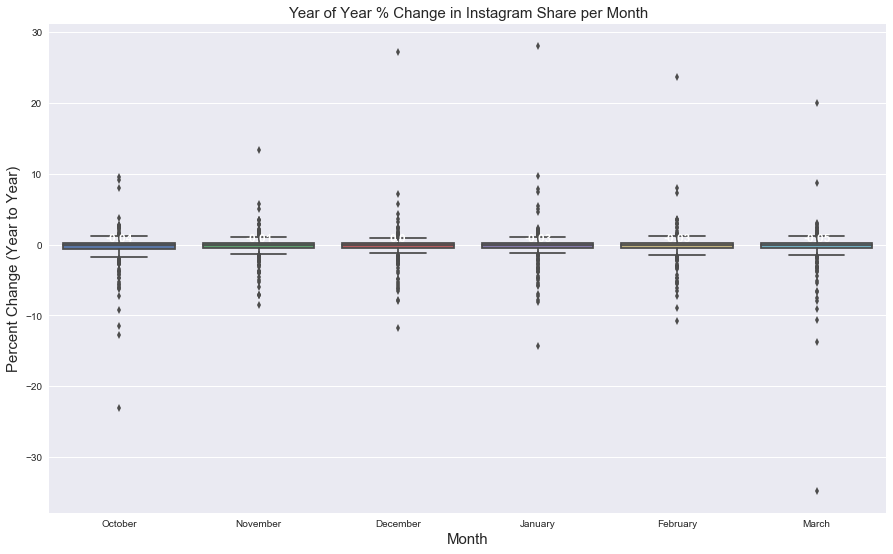

In [98]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='month',y='perc_change',data=li_all)

medians = li_all.groupby(['month'],sort=False)['perc_change'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Year of Year % Change in Instagram Share per Month',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Percent Change (Year to Year)',fontsize=15)
plt.show()

In [99]:
%store li_year_3

Stored 'li_year_3' (DataFrame)
